# Image warping from 1st principles

In [343]:
import inspect
import random
import os
import sys
from inspect import currentframe, getframeinfo,stack
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pprint
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import pyplot as plt
from pprint import pprint
base = r"D:/ENTC/SEM_4/EN2550 - Fundamentals of Image Processing and Machine Vision/~images/";






### to debug - printer with line number

In [ ]:
def _(*s):
    """Prints what ever the shit you put!"""
    cf = currentframe()
    print("LINE",cf.f_back.f_lineno,"printed --> ",*s)
    print("\n")




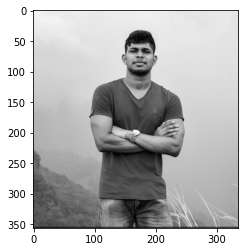

In [116]:
img = cv.imread(base + "r3ki3g.jpeg",0)
plt.imshow(img,cmap="gray")

## Eucladian matrix transformation - self coding


Have to find the destination image boundaries<br/>
Then should reverse map each pixel in that destination image, to the source image pixels using the inverse of the transformation matrix<br/>
Should use a proper averaging method to get the values when the pixel values are floats.<font color="red"> SKIPPED</font><br/>
Python negative indexing causes repeats, instead of giving black pixels for the out-range-negatives.

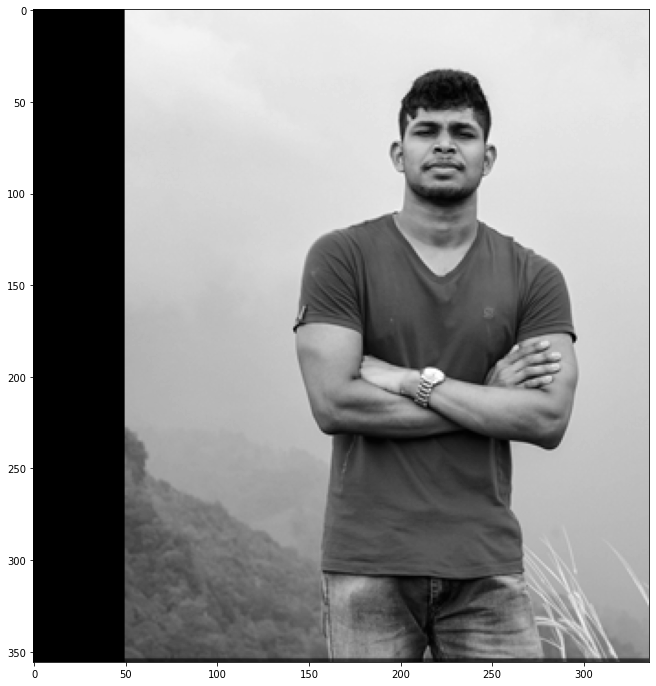

In [443]:
transImg = np.zeros(img.shape)
theta = (0/180) * np.pi
tx = 50
ty = 0

# matrix
for i in range(transImg.shape[0]):
    for j in range(transImg.shape[1]):
        x2,y2 = j,i
        X2 = np.array([[x2],
                       [y2],
                      [1]])
        R = np.array([[np.cos(theta),-np.sin(theta),tx],
                      [np.sin(theta),np.cos(theta),ty],
                     [0,             0,             1]])
        X1 = np.linalg.inv(R) @ X2
        x1,y1 = X1[0]/X1[2],X1[1]/X1[2]
#         print(x1,y1)
        j1,i1 = x1[0],y1[0]
        
        pixel = 0
        try:
            if int(round(i1))>=0 and int(round(j1))>=0:
                pixel = img[int(round(i1))][int(round(j1))]
        except:
            pass
        transImg[i,j] = pixel
        
 
        
fig, ax = plt.subplots(1,figsize=(12,12))
ax.imshow(transImg,cmap="gray")  



# print(transImg)

<font color="red">
    <b>Transformation is slow!</b>
    
</font>

## Rotating around the centre
For that centre of the image should be mapped (T1) to the (0,0) then rotate and do the inverse of T1 again then display the image.<br/>
All these can be done using Eucladian transforms- composition, in proper order!

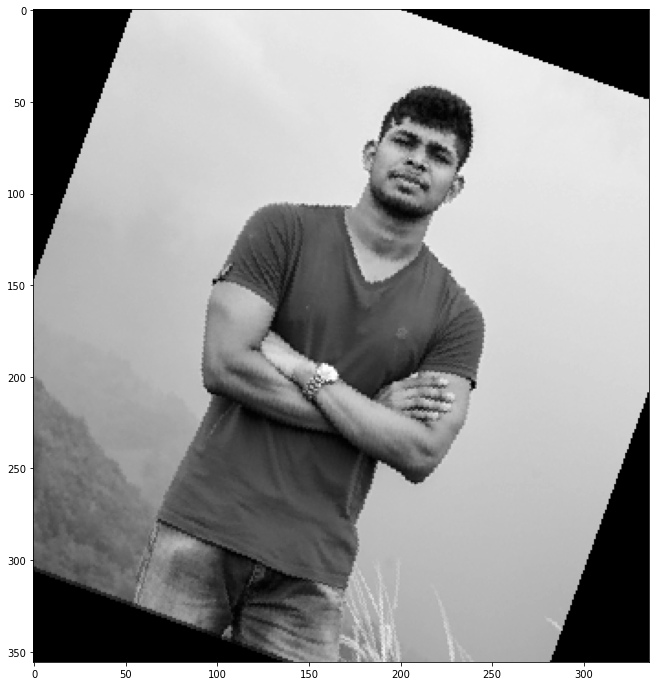

In [445]:
transImg = np.zeros(img.shape)
theta = (20/180) * np.pi
tx = 0
ty = 0

# matrix
for i in range(transImg.shape[0]):
    for j in range(transImg.shape[1]):
        x2,y2 = j,i
        X2 = np.array([[x2],
                       [y2],
                      [1]])
        
        tx_pre = -1 * img.shape[1]//2
        ty_pre = -1 * img.shape[0]//2
        T1 = np.array([[1,0,tx_pre],
                      [0,1,ty_pre],
                     [0,             0,             1]])
        R = np.array([[np.cos(theta),-np.sin(theta),tx],
                      [np.sin(theta),np.cos(theta),ty],
                     [0,             0,             1]])
        
        T_composition = np.linalg.inv(T1) @ R @ T1
        X1 = np.linalg.inv(T_composition) @ X2
        x1,y1 = X1[0]/X1[2],X1[1]/X1[2]
#         print(x1,y1)
        j1,i1 = x1[0],y1[0]
        
        pixel = 0
        try:
            if int(round(i1))>=0 and int(round(j1))>=0:
                pixel = img[int(round(i1))][int(round(j1))]
        except:
            pass
        transImg[i,j] = pixel
        
 
        
fig, ax = plt.subplots(1,figsize=(12,12))
ax.imshow(transImg,cmap="gray")  



# print(transImg)

<font color="red">
    <b>Transformation is slow!</b><br/>
    Looks low quality and have lost some data in the transformation (No proper averaging method used)
</font>

## SIFT matches and Image stitching with Warping by finding the best hormography

In [184]:
def siftMatchFinder(img1,img2):
    sift = cv.SIFT_create()
    im1, des_1 = sift.detectAndCompute(img1, None) 
    im2, des_2 = sift.detectAndCompute(img2, None)
    T1 = cv.BFMatcher(cv.NORM_L1, crossCheck = True)
    Match = T1.match(des_1, des_2)
    sortMatch = sorted(Match, key = lambda x:x.distance)
    img4 = cv.drawMatches(img1, im1, img2, im2, sortMatch[:100], img2, flags =2)
    fig, ax = plt.subplots(1,1, figsize = (18, 18))
    ax.imshow(img4)
    ax.axis('off')
    plt.show()
    return Match,[im1,im2]

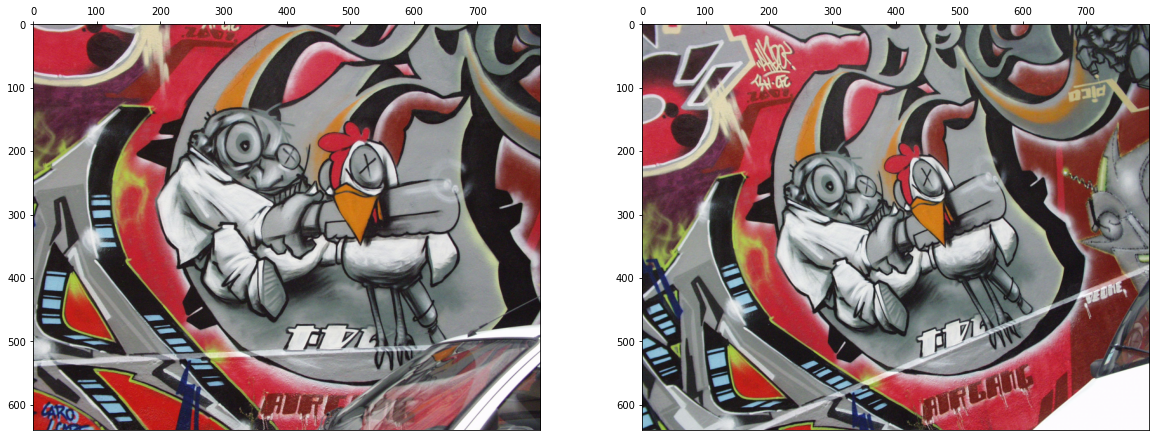

In [430]:
img1 = cv.cvtColor(cv.imread(base + "img1.ppm",1),cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(cv.imread(base + "img2.ppm",1),cv.COLOR_BGR2RGB)

assert img1 is not None and img2 is not None

fig,ax = plt.subplots(1,2,figsize=(20,20))
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[0].xaxis.tick_top(),ax[1].xaxis.tick_top();

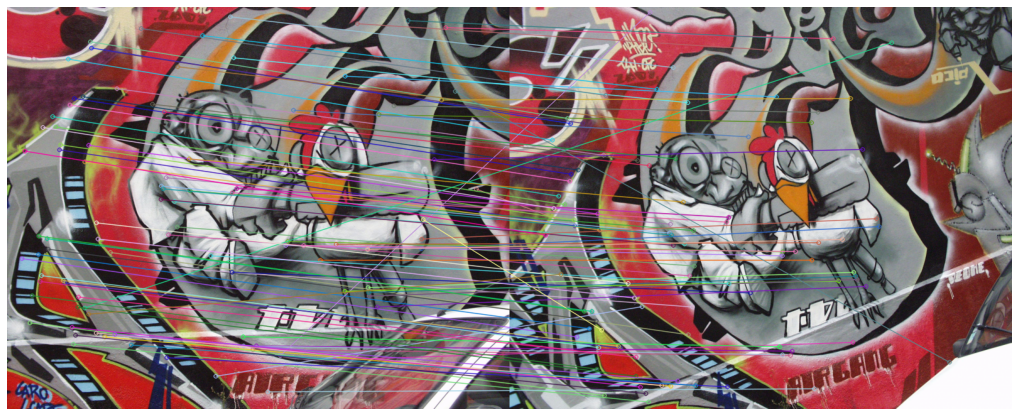

In [446]:
m,k = siftMatchFinder(img1,img2)

In [431]:
img1 = cv.imread(base + "img1.ppm",1)
img2 = cv.imread(base + "img2.ppm",1)

img1g = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2g = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)



sift = cv.SIFT_create()
im1, des_1 = sift.detectAndCompute(img1g, None) 


_(dir(im1[0]))
_(im1[0])
_(im1[0].pt)
_(des_1.shape)
_(des_1[0])

im2, des_12 = sift.detectAndCompute(img2g, None)
T1 = cv.BFMatcher(cv.NORM_L1, crossCheck = 1)

Match = T1.match(des_1, des_2)
_((Match[0]).distance)
_((dir(Match[0])))

_((Match[0]).trainIdx)


sortMatch = sorted(Match, key = lambda x:x.distance)



LINE 16 printed -->  ['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'angle', 'class_id', 'convert', 'octave', 'overlap', 'pt', 'response', 'size']


LINE 17 printed -->  <KeyPoint 000001DEA60E0060>


LINE 18 printed -->  (2.428295612335205, 320.7454833984375)


LINE 19 printed -->  (2674, 128)


LINE 20 printed -->  [  2. 127. 164.   7.   1.   0.   0.   0.  36. 164.  88.   2.   0.   0.
   0.   0.  19.  40.  10.   1.   0.   0.   0.   1.  13.   3.   5.   2.
   2.   0.   0.   7.  57. 137. 135.   1.   0.   0.   0.   1. 164. 164.
  24.   0.   0.   0.   0.  12. 120.  22.   0.   0.   0.   9.  23.  25.
  24.   2.   2.   0.   0.   4.   8.   9.  35.   6.   1.   0.   0.   0.
   0.   3. 164.  17.   0.   0.   0.   0.   0.  73. 132. 

In [432]:

img4 = cv.drawMatches(img1, im1, img2, im2, sortMatch[:10], img2, flags =2)
fig, ax = plt.subplots(1,1, figsize = (18, 18))
ax.imshow(img4)
ax.axis('off')
plt.show()

LINE 1 printed -->  ['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'distance', 'imgIdx', 'queryIdx', 'trainIdx']


LINE 2 printed -->  139


LINE 3 printed -->  868




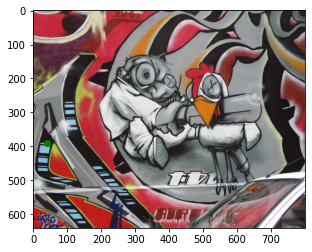

In [434]:
_(dir(sortMatch[0]))
_(sortMatch[0].queryIdx)
_(sortMatch[0].trainIdx)

p1I = sortMatch[0].queryIdx
p2I = sortMatch[0].trainIdx

x1,y1 = im1[p1I].pt
x2,y2 = im2[p2I].pt


fig,ax = plt.subplots()
ax.imshow(img1)
ax.plot([x1],[y1],marker="o",markersize=6,color="green")
plt.show()
fig,ax = plt.subplots()
ax.imshow(img2)
ax.plot([x2],[y2],marker="o",markersize=6,color="blue")

LINE 16 printed -->  [40.70734786987305, 713.3408203125, 62.912109375, 654.990234375, 110.60606384277344, 472.9199523925781, 106.8133544921875, 193.0255889892578, 664.3933715820312, 44.89201354980469, 66.91838073730469, 126.79637145996094, 573.3048095703125, 64.91687774658203, 609.19189453125, 97.19943237304688, 428.9523620605469, 85.14066314697266, 748.8619995117188, 727.4417114257812, 118.72479248046875, 103.99796295166016, 701.3958129882812, 422.55059814453125, 41.52219009399414, 491.3078308105469, 697.6669921875, 408.9817810058594, 434.4512023925781, 598.3235473632812, 408.9817810058594, 649.0258178710938, 195.68936157226562, 549.1141357421875, 522.4609985351562, 375.6131286621094, 461.40557861328125, 311.27337646484375, 538.9356079101562, 534.9425659179688]




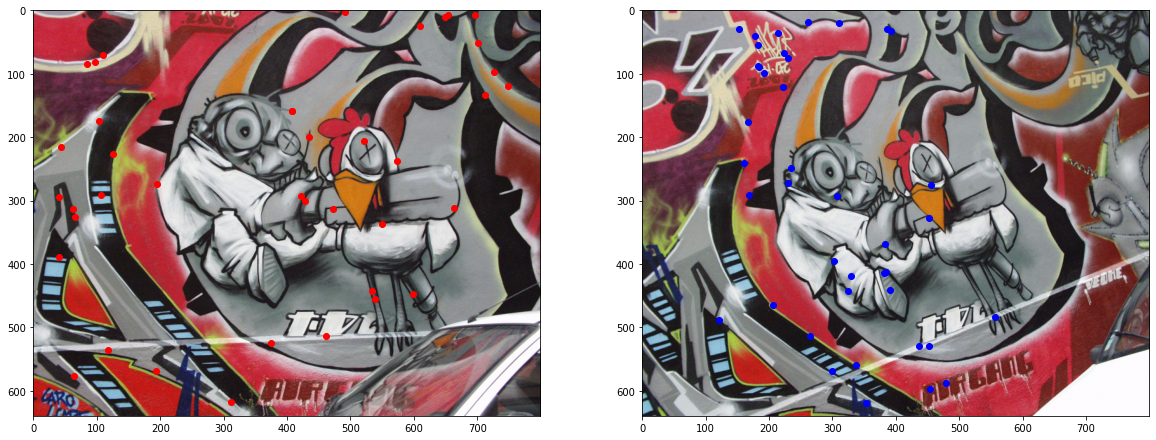

In [435]:
img1_matched_kp = []
img2_matched_kp = []


img1o = img1
img2o = img2

for i in range(len(sortMatch[:40])):
    thisMatch =  sortMatch[i]
    img1_matched_kp.append(im1[thisMatch.queryIdx].pt)
    img2_matched_kp.append(im2[thisMatch.trainIdx].pt)


    
    
_([pt[0] for pt in img1_matched_kp])
fig,ax = plt.subplots(1,2,figsize=(20,20))
ax[0].imshow(img1o)
ax[0].scatter([int(pt[0]) for pt in img1_matched_kp],[int(pt[1]) for pt in img1_matched_kp],marker="o",color="red")

ax[1].imshow(img2o)
ax[1].scatter([int(pt[0]) for pt in img2_matched_kp],[int(pt[1]) for pt in img2_matched_kp],marker="o",color="blue")
plt.show()





In [246]:
# def calculateHormography(Xs,Xd):
#     """returns the transformation matrix H_3x3: Xs --> Xd
#     Xs = [[xs1,ys1],[xs2,ys2],[xs3,ys3],[xs4,ys4]]
#     Xd = [[xd1,yd1],[xd2,yd2],[xd3,yd3],[xd4,yd4]]
#     """
#     #unpacking the corrdinates
#     xs1,ys1,xs2,ys2,xs3,ys3,xs4,ys4 = np.array(Xs).reshape((1,8))[0]
#     xd1,yd1,xd2,yd2,xd3,yd3,xd4,yd4 = np.array(Xd).reshape((1,8))[0]
    
    
#     P_ = np.array([[-xs1,  -ys1,  -1,   0,   0,   0,   xs1*xd1,  ys1*xd1,  xd1],
#                    [0,     0,   0, -xs1, -ys1,  -1,   xs1*yd1,  ys1*yd1,  yd1],
                 
#                  [-xs2,  -ys2,  -1,   0,   0,   0,   xs2*xd2,  ys2*xd2,  xd2],
#                    [0,     0,   0, -xs2, -ys2,  -1,   xs2*yd2,  ys2*yd2,  yd2],
                 
#                  [-xs3,  -ys3,  -1,   0,   0,   0,   xs3*xd3,  ys3*xd3,  xd3],
#                    [0,     0,   0, -xs3, -ys3,  -1,   xs3*yd3,  ys3*yd3,  yd3],
                 
#                  [-xs4,  -ys4,  -1,   0,   0,   0,   xs4*xd4,  ys4*xd4,  xd4],
#                    [0,     0,   0, -xs4, -ys4,  -1,   xs4*yd4,  ys4*yd4,  yd4]])
    
    
#     P_inv_okay = [1,1,1]
    
#     try:
#         M1 = np.array([0,0,0,0,0,0,1,0,0])
#         P1 = np.vstack((P_,M1))
#         P1_inv = np.linalg.inv(P1)
#     except:
#         P_inv_okay[0]=0
#     try:
#         M2 = np.array([0,0,0,0,0,0,0,1,0])
#         P2 = np.vstack((P_,M2))
#         P2_inv = np.linalg.inv(P2)
#     except:
#         P_inv_okay[1]=0
    
#     try:
#         M3 = np.array([0,0,0,0,0,0,0,0,1])
#         P3 = np.vstack((P_,M3))
#         P3_inv = np.linalg.inv(P3)
#     except:
#         P_inv_okay[2]=0

    
    
#     _(P_inv_okay)
    
#     all_P = []
#     all_H = []
#     if P_inv_okay[0]:
#         all_P.append(P1_inv)
#         H1 = P1_inv @ np.array([0,0,0,0,0,0,1,0,0]).T
#         all_H.append(np.array(H1/np.sum(H1**2)).reshape((3,3)))
        
#     if P_inv_okay[1]:
#         all_P.append(P2_inv)
#         H2 = P2_inv @ np.array([0,0,0,0,0,0,0,1,0]).T
#         all_H.append(np.array(H2/np.sum(H2**2)).reshape((3,3)))
        
        
#     if P_inv_okay[2]:
#         all_P.append(P3_inv)
#         H3 = P3_inv @ np.array([0,0,0,0,0,0,0,0,1]).T
        
#         all_H.append(np.array(H3/np.sum(H3**2)).reshape((3,3)))

#     return all_H
    
    
    
# _(calculateHormography([[0,0],[1,0],[1,1],[0,1]],[[0,0],[2,0],[2,2],[0,2]]))


# (cv.findHomography(np.array([[0,0],[1,0],[1,1],[0,1]]),np.array([[0,0],[2,0],[2,2],[0,2]]), cv.RANSAC, 5.0))

LINE 48 printed -->  [0, 0, 1]
LINE 73 printed -->  [array([[0.22222222, 0.        , 0.        ],
       [0.        , 0.22222222, 0.        ],
       [0.        , 0.        , 0.11111111]])]


(array([[ 2.00000000e+00,  0.00000000e+00, -1.92296269e-16],
        [ 0.00000000e+00,  2.00000000e+00, -5.76888806e-16],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]),
 array([[1],
        [1],
        [1],
        [1]], dtype=uint8))

In [436]:
def calculateHormography(Xs,Xd):
    """returns the transformation matrix H_3x3: Xs --> Xd
    Xs = [[xs1,ys1],[xs2,ys2],[xs3,ys3],[xs4,ys4]]
    Xd = [[xd1,yd1],[xd2,yd2],[xd3,yd3],[xd4,yd4]]
    """
    #unpacking the corrdinates
    xs1,ys1,xs2,ys2,xs3,ys3,xs4,ys4 = np.array(Xs).reshape((1,8))[0]
    xd1,yd1,xd2,yd2,xd3,yd3,xd4,yd4 = np.array(Xd).reshape((1,8))[0]
    
    
    P_ = np.array([[-xs1,  -ys1,  -1,   0,   0,   0,   xs1*xd1,  ys1*xd1,  xd1],
                   [0,     0,   0, -xs1, -ys1,  -1,   xs1*yd1,  ys1*yd1,  yd1],
                 
                 [-xs2,  -ys2,  -1,   0,   0,   0,   xs2*xd2,  ys2*xd2,  xd2],
                   [0,     0,   0, -xs2, -ys2,  -1,   xs2*yd2,  ys2*yd2,  yd2],
                 
                 [-xs3,  -ys3,  -1,   0,   0,   0,   xs3*xd3,  ys3*xd3,  xd3],
                   [0,     0,   0, -xs3, -ys3,  -1,   xs3*yd3,  ys3*yd3,  yd3],
                 
                 [-xs4,  -ys4,  -1,   0,   0,   0,   xs4*xd4,  ys4*xd4,  xd4],
                   [0,     0,   0, -xs4, -ys4,  -1,   xs4*yd4,  ys4*yd4,  yd4]])
    
    
    P_inv_okay = 1
    
    try:
        M1 = np.array([1]*9)
        P1 = np.vstack((P_,M1))
        P1_inv = np.linalg.inv(P1)
        
        H1 = P1_inv @ np.array([0,0,0,0,0,0,0,0,1]).T
        # _("from 1 :H")
        return P_inv_okay,(np.array(H1).reshape((3,3)))
        # return (np.array(H1/np.sum(H1**2)).reshape((3,3)))
    except:
        # _("err hormography calc")
        P_inv_okay=0
        return P_inv_okay,0
   
    
    
    
fourCoords = [[-2,0],[1,0],[1,1],[0,1]],[[0,1],[2,0],[2,2],[0,2]]
calc = calculateHormography(fourCoords[0],fourCoords[1])[1]


buitin = cv.findHomography(np.array(fourCoords[0]),np.array(fourCoords[1]), cv.RANSAC, 5.0)[1][0]

_(calc/buitin)


dst = calc @ np.array([1,0,1]).T
dst/=dst[2]
_(dst)


LINE 49 printed -->  [[ 0.4 -0.8  0.8]
 [-0.4  0.4  0.4]
 [-0.2 -0.4  0.8]]


LINE 54 printed -->  [2. 0. 1.]




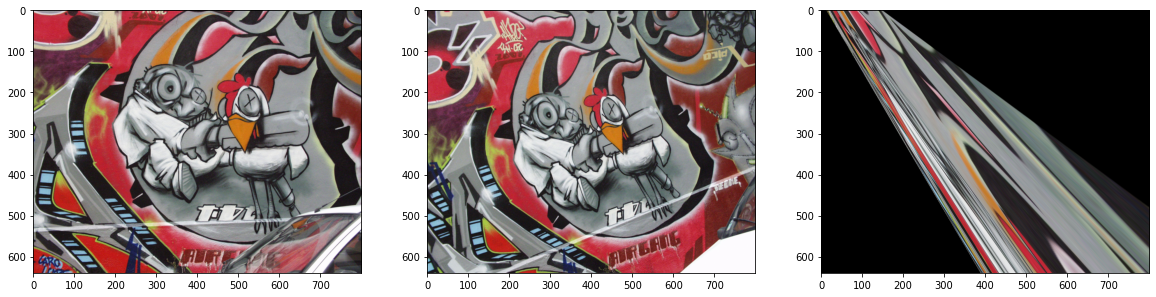

In [453]:
def RANSAC_best_hormography_finder(Xs,Xd,itertaions=1000):
    """Finds the best transformation matrix H_3x3 to represnt all the coords for H: Xs --> Xd"""
    Xs_inputMat = np.vstack((np.array(Xs).T,np.ones((1,len(Xs)))))
    Xd_outputMat = np.vstack((np.array(Xd).T,np.ones((1,len(Xd)))))
    
    # _(Xd_outputMat)
    
    minErrorGot_SSD = -1
    minError_H = -1
    countOfInliers = 0
    Xd_estimateMat_best = 0
    isInliersbest = 0
    
    
    for i in range(itertaions):
        samplesIdxs = random.sample(range(len(Xs)), 4)
        # print(samplesIdxs)
        Xs_4Samples = [Xs[samplesIdx] for samplesIdx in samplesIdxs]
        Xd_4Samples = [Xd[samplesIdx] for samplesIdx in samplesIdxs]
        
        # _(Xs_4Samples)
        # _(Xd_4Samples)
        
        H_candidate = calculateHormography(Xs_4Samples,Xd_4Samples) # gives the tuple (calculationOkay, H)
        # _(H_candidate)
        if not H_candidate[0]:
            continue
        
        H_candidate = H_candidate[1]
        
        Xd_estimateMat_unNormalized = H_candidate @ Xs_inputMat
        Xd_estimateMat = Xd_estimateMat_unNormalized/ np.vstack((Xd_estimateMat_unNormalized[2],
                                                                 Xd_estimateMat_unNormalized[2],
                                                                 Xd_estimateMat_unNormalized[2]))
        
        

        # _(Xd_estimateMat)
        
        difference = abs(Xd_outputMat - Xd_estimateMat)
        # _(difference<0.01)
        
        isInlier = difference < 10
        # _(isInlier)
        countOfInliers = np.sum(isInlier)
        SSD = np.sum((difference*isInlier)**2)
        
        if minErrorGot_SSD == -1 or SSD < minErrorGot_SSD:
            minErrorGot_SSD = SSD
            minError_H = H_candidate
            Xd_estimateMat_best= Xd_estimateMat
            isInliersbest = isInlier
        
    return (minError_H,
        minErrorGot_SSD,
        countOfInliers,
        len(Xs),
        Xd_estimateMat_best,
        Xd_outputMat,
        Xd_estimateMat_best-Xd_outputMat,
           isInliersbest)

    
        
    
H = RANSAC_best_hormography_finder(img1_matched_kp,img2_matched_kp,100)[0]

warped = cv.warpPerspective(img1,H,(img2.shape[1],img2.shape[0]))


fig,ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(warped)